# Welcome to Neuroimaging in Python

If you are running this from the SciNet jupyter hub, then use the paths in the top half of the block below.

If you are running this on a local laptop, edit the bottom of the first block with the paths to your desired direcoties..

In [2]:
# We are going to use a single subject from the ADHD dataset.
import os

# ## use these commands if you are running this on scinet
# my_home = os.environ.get('HOME')
# my_scratch = my_home.replace('/home/', '/scratch/')
# my_nilearn_data = os.path.join(my_scratch, 'nilearn_data') 
# my_tutorial_data = os.path.join(my_scratch, 'nilearn_tutorial_results')
# cc200_nii = '/scinet/course/ss2017/16_mripython/data/rois/cc200_roi_atlas.nii.gz'

## edit this section if you are running this one your own laptop
tutorial_dir ='/home/edickie/Documents/ss2017_16pythonmri/data/'  ## point this to the location where you want the data
my_nilearn_data = os.path.join(tutorial_dir, 'nilearn_data') 
my_tutorial_data = os.path.join(tutorial_dir, 'nilearn_tutorial_results')

## point this to the location of the craddock atlas you downloaded
cc200_nii = os.path.join(tutorial_dir, 'rois', 'cc200_roi_atlas.nii.gz') 


In [1]:
# this makes the plots show up..
import matplotlib.pyplot as plt
%matplotlib inline  

## Using nilearn data fetchers to grab our tutorial dataset

We are grabbing data from the ABIDE dataset. A data sharing initiative with over 1000 scans. Check out the references included in the abide object for more info. 

Thanks to the work of the proprocessed connectome project. A lot of the data processing work has been done for us! We are going to grab the preprocessed but unfilted resting stat MR data.

In [49]:
from nilearn import datasets

# We specify the site and number of subjects we want to download
abide = datasets.fetch_abide_pcp(data_dir=my_nilearn_data,
                                 derivatives=['func_mean', 'func_preproc', 'func_mask'],
                                 quality_checked= True, 
                                 n_subjects = 4)

print(abide.description)

ABIDE


Notes
-----
The Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously
collected resting state functional magnetic resonance imaging datasets
from 539 individuals with ASD and 573 typical controls for the purpose
of data sharing in the broader scientific community. This grass-root
initiative involved 16 international sites, sharing 20 samples yielding
1112 datasets composed of both MRI data and an extensive array of
phenotypic information common across nearly all sites (see below).

Note that this is the preprocessed version of ABIDE provided by the
preprocess connectome projects (PCP).


Content
-------
    :'phenotypic': Behavioral information.


References
----------

For more information about this dataset's structure:
http://preprocessed-connectomes-project.github.io
http://www.childmind.org/en/healthy-brain-network/abide/

Nielsen, Jared A., et al. "Multisite functional connectivity MRI
classification of autism: ABIDE results." Frontiers in human neuroscie

In [4]:
abide.func_preproc

['/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz',
 '/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050004_func_preproc.nii.gz',
 '/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050005_func_preproc.nii.gz',
 '/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050006_func_preproc.nii.gz',
 '/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050007_func_preproc.nii.gz',
 '/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050008_func_preproc.nii.gz',
 '/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050010_func_preproc.nii.gz',
 '/home/edickie/Documents/ss2017_16pythonmri/data/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pit

#### Here we will define the files we want to work with for the rest of the tutorial 

We need:
    + some Regions of Interest (rois) to use as masks for our analysis
    + a functional MR image
    + (for plotting) The mean of our functional MR image
    + (for masking) a mask defining the brain vs outside of head
    + to decide which roi we will focus on

In [60]:
rois = cc200_nii
func = abide.func_preproc[0]
mask = abide.func_mask[0]
mean_func = abide.func_mean[0]
roi = 174

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


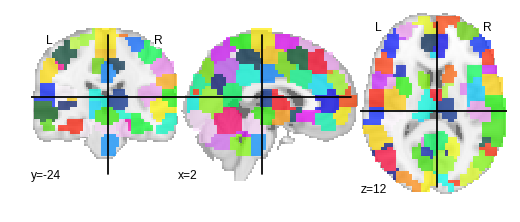

In [61]:
from nilearn import plotting

plotting.plot_roi(cc200_nii)

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


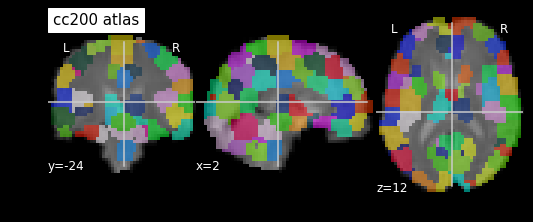

In [7]:
plotting.plot_roi(cc200_nii, bg_img=mean_func, alpha = 0.5, title = "cc200 atlas")

## Using nibabel to load nifti images

In [62]:
# this is for interacting with NIFTI files
import nibabel as nib

func_nib = nib.load(func)
print(func_nib)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (61, 73, 61, 196)
affine: 
[[  -3.   -0.    0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  61  73  61 196   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.   3.   3.   3.   1.5  0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sf

In [63]:
affine = func_nib.get_affine()
affine

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  """Entry point for launching an IPython kernel.


array([[  -3.,   -0.,    0.,   90.],
       [  -0.,    3.,   -0., -126.],
       [   0.,    0.,    3.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [64]:
header = func_nib.get_header()
print(header.keys())

['sizeof_hdr', 'data_type', 'db_name', 'extents', 'session_error', 'regular', 'dim_info', 'dim', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'pixdim', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'descrip', 'aux_file', 'qform_code', 'sform_code', 'quatern_b', 'quatern_c', 'quatern_d', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'srow_x', 'srow_y', 'srow_z', 'intent_name', 'magic']


/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  """Entry point for launching an IPython kernel.


In [65]:
# get the dimensions for the fMRI file
dims = func_nib.shape
dims

(61, 73, 61, 196)

In [66]:
# use get data to extract the data from it
func_data = func_nib.get_data()
func_data.shape

(61, 73, 61, 196)

In [67]:
# reshape to voxels * timepoints (4D --> 2D)
func_data = func_data.reshape(dims[0]*dims[1]*dims[2], dims[3])

### Checkling that our functional and mask files have the same dimensions...

In [68]:
# now do the same thing for rois
rois_data = nib.load(rois).get_data()

print(rois_data.shape)

if rois_data.shape[0:2] == dims[0:2]:
    print("ROIs and func file dimensions match, Hooray!!")
else:
    print("FAIL, they do not match")

(63, 75, 61)
FAIL, they do not match


### Using nilearn to sample the rois nifti file so that they match in dimensions

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "
/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


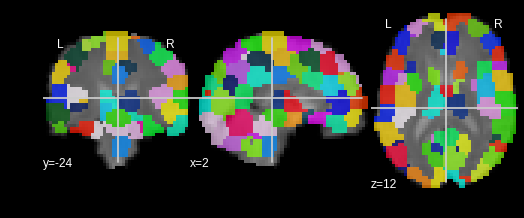

In [69]:
from nilearn import image
resampled_cc200 = image.resample_to_img(cc200_nii, mean_func, interpolation = 'nearest')

plotting.plot_roi(resampled_cc200, mean_func)

resampled_cc200.to_filename(os.path.join(tutorial_dir, 'rois', "resample_cc200.nii.gz"))

In [70]:
# now do the same thing for rois
new_rois = os.path.join(tutorial_dir, 'rois', "resample_cc200.nii.gz")
rois_data = nib.load(new_rois).get_data()

print(rois_data.shape)

if rois_data.shape[0:2] == dims[0:2]:
    print("ROIs and func file dimensions match, Hooray!!")
else:
    print("FAIL, they do not match")

(61, 73, 61)
ROIs and func file dimensions match, Hooray!!


## Calculating our own seed correlation map using numpy

In [71]:
rois_data = rois_data.reshape(dims[0]*dims[1]*dims[2], 1)

### Calculating our mean timeseries

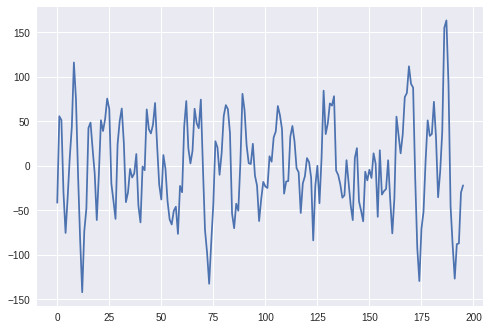

196

In [72]:
import numpy as np

# get the seed time series
idx = np.where(rois_data == roi)[0]
ts = np.mean(func_data[idx, :], axis=0)

# look at the timeseries
plt.plot(ts)
plt.show()
len(ts) # looks like it's the right length (i.e., our axis is correct)

### Correlate the mean timeseries with the timeseries from every voxel in the func file

In [73]:
# make an output matrix
output = np.zeros(dims[0]*dims[1]*dims[2])

# correlate seed against all voxels
for i in range(dims[0]*dims[1]*dims[2]):
    output[i] = np.corrcoef(ts, func_data[i, :])[0][1]

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


### When will do a faster and with no "true divide" warning if we incorporate the brain mask

In [74]:
## add a mask to get rid of the weird bits
mask_data = nib.load(mask).get_data()
mask_data = mask_data.reshape(dims[0]*dims[1]*dims[2], 1)
idx_mask = np.where(mask_data > 0)[0]

## recalculate the ts taking the mask into account
idx_masked = np.intersect1d(idx,idx_mask)
ts = np.mean(func_data[idx_masked, :], axis=0)

# make an output matrix
output = np.zeros(dims[0]*dims[1]*dims[2])

# correlate seed against all voxels
for i in np.arange(len(idx_mask)):
    output[idx_mask[i]] = np.corrcoef(ts, func_data[idx_mask[i], :])[0][1]


## Using nibabel to write our result out to a nifti file

In [83]:
np.unique(rois_data)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [75]:
# get back to 4D
output_filename = os.path.join(tutorial_dir, 'seed_correlation.nii.gz')
output = np.reshape(output, (dims[0], dims[1], dims[2], 1))

# write the results into a NIFTI file
output = nib.nifti1.Nifti1Image(output, affine)
output.to_filename(output_filename)

## nilearn's glass brain and statmap plots help us visualize our new result

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/nilearn/plotting/glass_brain.py:164: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  black_bg = colors.colorConverter.to_rgba(ax.get_axis_bgcolor()) \
/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


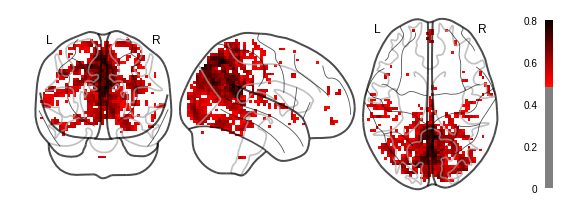

In [76]:
plotting.plot_glass_brain(output_filename, threshold = 0.5, 
                          colorbar = True)

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


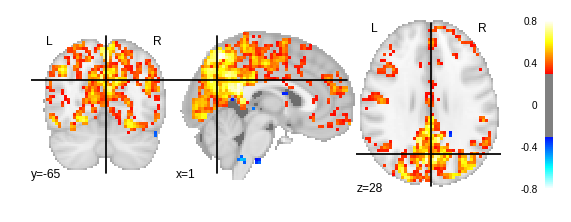

In [77]:
plotting.plot_stat_map(output_filename, threshold = 0.3, 
                          colorbar = True)

## instead of calculating one mean timeseries, let's do it for the whole atlas

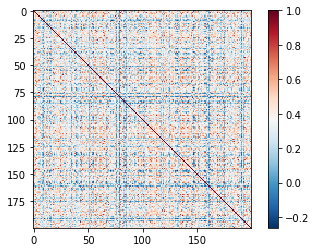

In [26]:
# create output matrix
output_ts = np.zeros((len(np.unique(rois_data))-1, dims[3]))

# rois_data_masked = np.multiply(rois_data,mask_data)
# load in all mean time series from atlas
for i, roi in enumerate(np.unique(rois_data)):
    if roi > 0:
        idx = np.where(rois_data == roi)[0]
        ts = np.mean(func_data[idx, :], axis=0)
        output_ts[i-1, :] = ts

# correlation matrix
cc200_correl = np.corrcoef(output_ts)

# view output
plt.imshow(cc200_correl, interpolation='nearest', cmap=plt.cm.RdBu_r)
plt.colorbar()

### The seaborn package has some really awesome option..uncluding and easy clustered heatmap plot

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


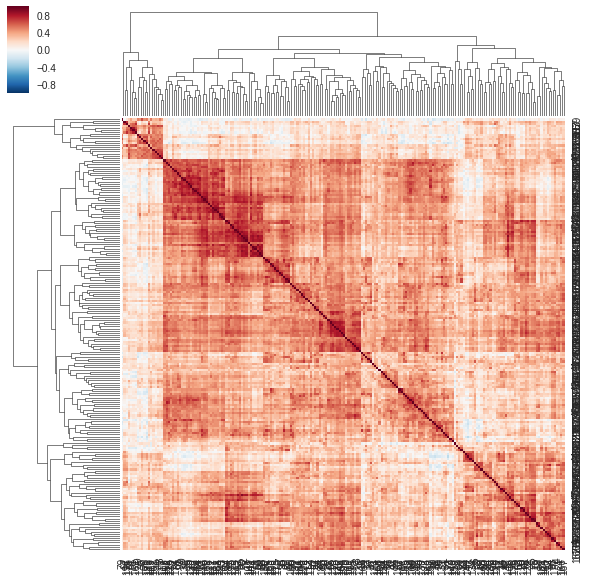

In [28]:
import seaborn

seaborn.clustermap(cc200_correl)

## Getting fancier with nilearn

nilearn was built by people doing machine learning of resting state fMRI data using sci-kit learn.

It has A LOT of functionallity beyond what we have time to teach here. Including:
+ image manipulation (smoothing, resampling)
+ algorithms (ICA and dictionary learning) for parcellating your own dataset (i.e. defining your own ROIS) 
+ timeseries extraction with many many options for filtering, detrending 
+ multiple methods for covariance esimtaiton (i.e. partial correlation, covariance, lasso..)
+ machine learning and cross validation

They also did a beautiful job of building a large set of ipython notebook tutorials to teach you about all these methods.

Go to the [the nilean website](http://nilearn.github.io/index.html) for more info.

Let's use another example to see some of the more complex things nilearn can do...

We'll start by using the data fetcher to grab a different atlas. This one (dosenbach_2010) if a set of coordinates in the brain to sample from..

In [40]:
from nilearn import datasets

dosenbach = datasets.fetch_coords_dosenbach_2010()
print(dosenbach.description)

dict_keys(['description', 'networks', 'rois', 'labels'])
Dosenbach 2010 atlas


Notes
-----
160 regions of interest covering much of the cerebral cortex and cerebellum.
They were obtained from meta-analyses of fMRI activation studies
and assigned into 6 networks according to a modularity analysis of
resting-state data.


Content
-------
    :'rois': Coordinates of ROIs in MNI space.
    :'labels': ROIs labels.
    :'networks': Networks names.


References
----------
Dosenbach N.U., Nardos B., et al. "Prediction of individual brain maturity
using fMRI.", 2010, Science 329, 1358-1361.



/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


### Using nilearn's sphere masker to extract the timeseries

nilearn has a built in function for extracting timeseries from functional files and doing a little extra signal processing at the same time!

In [41]:
from nilearn import input_data

spheres_masker = input_data.NiftiSpheresMasker(
    seeds=dosenbach.rois, #the seeds are the dosenbach roi atlas
    smoothing_fwhm=4, radius=4.5, # set the radius of a sphere around the roi you want extracted
    standardize=True, # the time-series are centered and normed (mean 0, variance 1 in the time dimension)
    detrend=True, low_pass=0.1, high_pass=0.01, t_r=2.5) # additional signal cleaning and filtering params

timeseries = spheres_masker.fit_transform(abide.func_preproc[0])

print("the shape of the timeseries is {}".format(timeseries.shape))

the shape of the timeseries is (196, 160)


### Using nilearn's ConnectivityMeasure to calculate our correlation matrix

Avalable options are “correlation”, “partial correlation”, “tangent”, “covariance”, “precision” or other utilites in sci-py could be plugged in ([see here for an example](http://nilearn.github.io/auto_examples/03_connectivity/plot_multi_subject_connectome.html#sphx-glr-auto-examples-03-connectivity-plot-multi-subject-connectome-py))

Let's do partial correlation this time

In [46]:
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

correlation_measure = ConnectivityMeasure(kind='covariance')
dosenbach_matrix = correlation_measure.fit_transform([timeseries])[0]

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


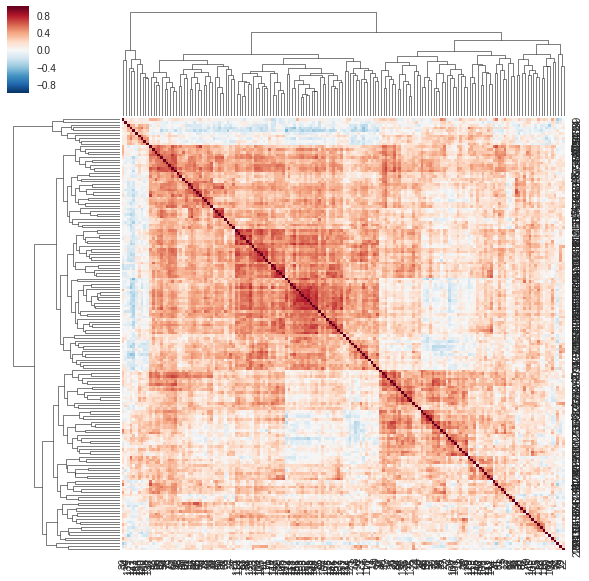

In [47]:
seaborn.clustermap(dosenbach_matrix)

/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/edickie/anaconda/envs/edickie_sci/lib/python3.5/site-packages/nilearn/plotting/glass_brain.py:164: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  black_bg = colors.colorConverter.to_rgba(ax.get_axis_bgcolor()) \


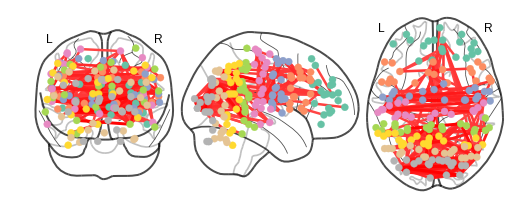

In [48]:
from nilearn import plotting

coords = np.vstack((
    dosenbach.rois['x'],
    dosenbach.rois['y'],
    dosenbach.rois['z'],
)).T

plotting.plot_connectome(dosenbach_matrix, node_coords = coords, edge_threshold='98%')